# Assignment 2 - Question 1
The objective of this assignment is to get you familiarize with  the  problem  of  `KNN Classifiers`.


## Instructions
- Do not Use Direct Inbuilt functions for the Task.
- Numpy or other math libraries are allowed 
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not change the contents of the Given cells. Use new cells to Write your code.


## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Q1.ipynb`
- Fill the Name and Roll number in the below markdown

Name: Kiran Reddy Bhumireddy<br>
Roll Number: 2020101064

### Dataset

Use the code below to load the Dataset

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
#Load data
iris = pd.read_csv('Iris.csv')
#data cleaning
iris.drop(columns="Id",inplace=True)

In [3]:
#features and labels
X=iris.iloc[:,0:4].values
y=iris.iloc[:,4].values

#Train and Test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

Write your Code below for KNN Classifier.<br>
Use different values of K and test the accuracies.

In [6]:
def classify_data_point(K, data_point, X_train, y_train):
    label = ''
    setosa = [0, 'Iris-setosa']
    versicolor = [0, 'Iris-versicolor']
    virginica = [0, 'Iris-virginica']

    dummy_array = np.array([list(data_point)] * len(y_train))

    diff_array   = X_train - dummy_array
    square_dist_array = np.square(diff_array) ## squares each elem in the array (Using Eucledian Norm)

    sum_of_rows_array = np.sum(square_dist_array, axis=1).reshape((len(y_train), 1))
    y_train_copy = y_train.copy().reshape((len(y_train), 1))
    dist_with_labels_array = np.append(sum_of_rows_array, y_train_copy, axis = 1)

    sorted_array = dist_with_labels_array[dist_with_labels_array[:, 0].argsort()]

    for i in range(K):
        if(sorted_array[i][1] == 'Iris-virginica'):
            virginica[0] += 1
        elif (sorted_array[i][1] == 'Iris-versicolor'):
            versicolor[0] += 1
        else:
            setosa[0] += 1

    
    final_array = np.array([setosa, versicolor, virginica])
    final_array = final_array[final_array[:, 0].argsort()]
    
    label = final_array[2][1]

    return label
    

def classify_X_test_corresponding_K(K, X_train, y_train, X_test):
    y_test_output_coressponding_K = []

    for i in range(len(X_test)):
        label = classify_data_point(K, X_test[i], X_train, y_train)
        y_test_output_coressponding_K.append(label)

    # print(y_test_output_coressponding_K) 

    return y_test_output_coressponding_K


    
def K_error_rate(K_vals, K_error, X_test, y_test, X_train, y_train):
    
    for i in range(len(K_vals)):
        K = K_vals[i]
        
        y_test_output_coressponding_K = classify_X_test_corresponding_K(K, X_train, y_train, X_test)

        diff = 0
        for j in range(len(y_test)):
            if(y_test_output_coressponding_K[j] != y_test[j]):
                diff += 1
        
        K_error[i] = diff / len(y_test)

    return K_error


K_vals       = [K for K in range(1, len(y_train), 1)] 
K_error      = [0 for K in range(len(K_vals))]
errors       = []


for i in range(200):
      X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=i)
      K_error = K_error_rate(K_vals, K_error, X_test, y_test, X_train, y_train)
      errors.append(np.array(K_error))

errors = np.array(errors)
error = np.mean(errors, axis = 0)

best_K = np.argmin(error) + 1


print(best_K, "Nearest Neighbour/s gave the best accuracy")


10 Nearest Neighbour/s gave the best accuracy


[]

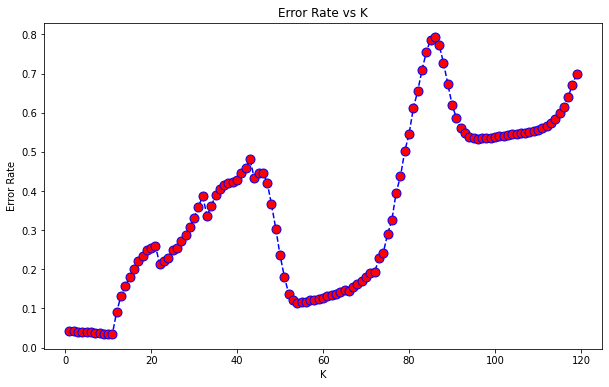

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(K_vals, error, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=9)
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.plot()

### Questions

1) What are the Advantages and Disadvantages of KNN algorithm?<br>
2) What is the complexity of the KNN algorithm during Training and Testing?<br> 
3) Is euclidian distance the only distance metric used in KNN? 
4) what K value gave the best accuracy?

1) What are the Advantages and Disadvantages of KNN algorithm?<br>
   Advantages: </br></br> 
   No training required, so new data can be added ata any time </br>
   </br>
   Disdvantages: </br></br>
    Doesn't work well when dataset is large </br>
   Data normalization </br>
   Sesnitive to noise and missing data
   </br>
2) What is the complexity of the KNN algorithm during Training and Testing?<br>
   Training: O(1)
   Testing: O(nlogn * K)
   

3) Is euclidian distance the only distance metric used in KNN? </br> 
   >No, Minkowski Distance, Manhattan distance , Cosine Distance are also used in KNN. 
4) what K value gave the best accuracy? 
    >10th nearest neighbour           